<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Augmentation-Example" data-toc-modified-id="Augmentation-Example-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Augmentation Example</a></span></li></ul></li><li><span><a href="#Play-with-Efficient-NET" data-toc-modified-id="Play-with-Efficient-NET-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Play with Efficient NET</a></span></li></ul></div>

In [21]:
from collections import Counter
import PIL.Image as Image
import torch
import torchvision
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt

from main import DataHandler

## Data

In [22]:
fmnist = FashionMNIST(root="../data", download=True)
fmnist_test = FashionMNIST(root="../data", download=True, train=False)
print(fmnist.train_data.shape);

torch.Size([60000, 28, 28])


/home/cortica/Documents/my/anaconda3/envs/fastai/lib/python3.6/site-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


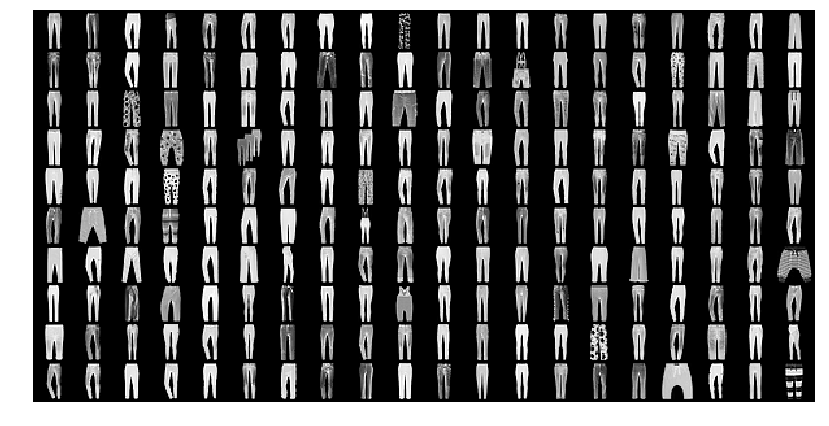

In [23]:
LABEL_SHOW = 1

def make_grid(data, labels, n=200, pad_value=0, label=None):
    if label is not None:
        class_indexes = np.argwhere(labels==label).squeeze()
    else:
        class_indexes = range(len(labels))
    random_indexes = np.random.choice(class_indexes, replace=False, size=n)
    sample = data[random_indexes, :]
    sample = sample.unsqueeze(1)
    grid = torchvision.utils.make_grid(sample, nrow=20, pad_value=pad_value)
    grid = grid.permute(1, 2, 0)
    return grid

def plot_grid(grid):
    plt.imshow(grid)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(14, 8)
    # plt.title(fmnist.classes[LABEL_SHOW]);
    ax.axis("off");

# make grid of same label data
grid = make_grid(fmnist.data, fmnist.targets, label=LABEL_SHOW)

# plot
plot_grid(grid)


In [10]:
fmnist.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### Augmentation Example

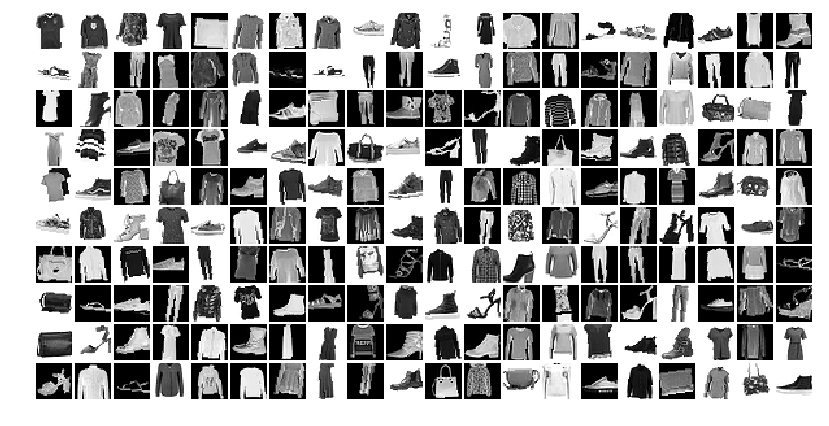

In [13]:
tr_data = DataHandler.get_train_dataloader(batch_size=5000, transform=DataHandler.PREPROCESS_AUGMENTATION)
data, labels = next(iter(tr_data))
data = data * 255.0
data = data.int()

grid_aug = make_grid(data.squeeze(), labels, pad_value=255)
plot_grid(grid_aug.cpu())

## Play with Efficient NET 

In [1]:
# pip install --upgrade efficientnet-pytorch

In [8]:
from  efficientnet_pytorch import EfficientNet
from torchsummary import summary

In [19]:
model = EfficientNet.from_pretrained("efficientnet-b0", num_classes=10, in_channels=1)
model.set_swish(memory_efficient=False)


Loaded pretrained weights for efficientnet-b0


In [20]:
summary(model.cuda(), input_size=(1, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1            [-1, 1, 33, 33]               0
Conv2dStaticSamePadding-2           [-1, 32, 16, 16]             288
       BatchNorm2d-3           [-1, 32, 16, 16]              64
             Swish-4           [-1, 32, 16, 16]               0
         ZeroPad2d-5           [-1, 32, 18, 18]               0
Conv2dStaticSamePadding-6           [-1, 32, 16, 16]             288
       BatchNorm2d-7           [-1, 32, 16, 16]              64
             Swish-8           [-1, 32, 16, 16]               0
          Identity-9             [-1, 32, 1, 1]               0
Conv2dStaticSamePadding-10              [-1, 8, 1, 1]             264
            Swish-11              [-1, 8, 1, 1]               0
         Identity-12              [-1, 8, 1, 1]               0
Conv2dStaticSamePadding-13             [-1, 32, 1, 1]             288
         Identity